In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

# Learning Objectives

1. Name and recognize the two interfaces to matplotlib
2. Be able to use both interfaces to generate charts
3. Understand the connection between matplotlib and seaborne/pandas
4. Make plots with multiple datasets, and figures
5. Know the recommended functional form for writing your own plotting functions

# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* Seaborn
* **Matplotlib**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applicatione e.g. | too high |

# plt example

In [2]:
np.arange(5, 10, 0.3)

array([ 5. ,  5.3,  5.6,  5.9,  6.2,  6.5,  6.8,  7.1,  7.4,  7.7,  8. ,
        8.3,  8.6,  8.9,  9.2,  9.5,  9.8])

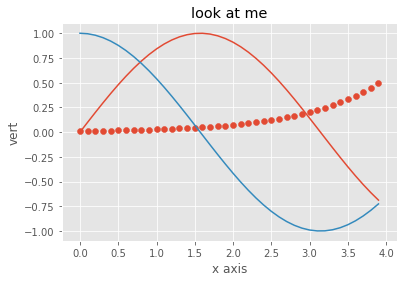

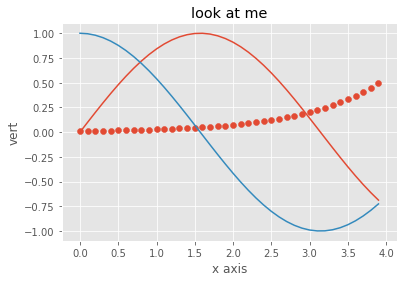

In [121]:
x_data = np.arange(0, 4, .1)
y_data = np.sin(x_data)
y_data_3 = np.exp(x_data)
ax0 = plt.plot(x_data, y_data)
plt.title("look at me")
plt.xlabel('x axis')
plt.ylabel('vert')

plt.plot(x_data, np.cos(x_data))
plt.scatter(x_data, y_data_3/100)
#plt.plot(x_data, y_data_3)
fig = plt.gcf()
# plt.show() # uncomment this line if you didn't start the notebook with %matplotlib inline
fig

In [120]:
ax0

In [22]:
x_data.shape

(40,)

In [24]:
y_data_3.shape

(40,)

In [6]:
type(plt)

module

In [7]:
type(plt.plot)

function

## Weird

`plt` was imported as a library, but it appears to be keeping some state between the last two lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

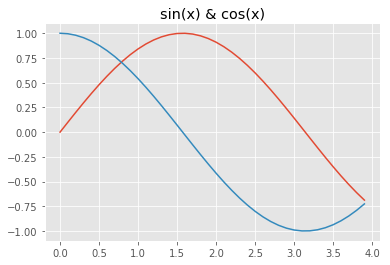

In [25]:
#x_data = np.arange(0.01, 4.01, .01)
#y_data = np.sin(x_data)
plt.plot(x_data, y_data)
#We can actually keep adding state here, and it will be 
#reflected when we finally call show.
plt.plot(x_data, np.cos(x_data))
plt.title("sin(x) & cos(x)")

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

# Behind the curtain

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)



In [14]:
plt.figure?

In [15]:
fig = plt.figure()
fig.add_subplot?

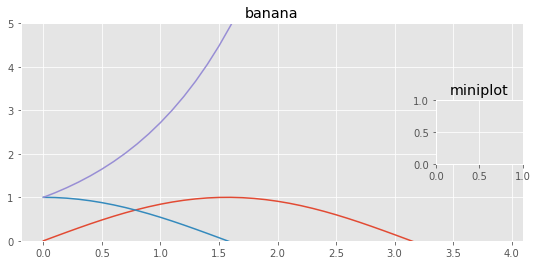

In [53]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(1,1,1) #nrows, ncols, plotnumber
ax.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
ax.set_title('sin(x) and cos(x)')

ax2 = fig.add_subplot(1,1,1) #nrows, ncols, plotnumber
ax2.plot(x_data, y_data_3)
ax2.set_title('banana')
ax2.set_ylim([0,5])

ax3 = fig.add_subplot(3,5,10) #nrows, ncols, plotnumber
#ax3.plot(x_data, y_data)
ax3.set_title('miniplot')

In this example, the fact that state is maintained is less surprising.

# Mix 'n' Match

Turns out, you can combine `plt` and object-oriented approach.

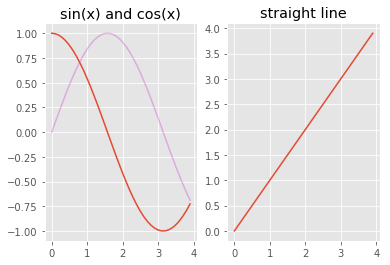

In [39]:
fig = plt.figure()
ax = fig.add_subplot(121)
plt.title('sin(x) and cos(x)')
ax2 = fig.add_subplot(1,2,2)
plt.title('straight line')
#plt.gca()
ax_ret = ax.plot(x_data, y_data, color='m', alpha=.25)
ax.plot(x_data, np.cos(x_data))
# ax_ret[0].set_alpha(.25) # alternative to using the alpha keyword when calling ax.plot
ax2.plot(x_data, x_data)
plt.show()

In [42]:
ax_ret

In [44]:
line_thing = ax_ret[0]

In [46]:
line_thing.

TypeError: contains() missing 1 required positional argument: 'mouseevent'

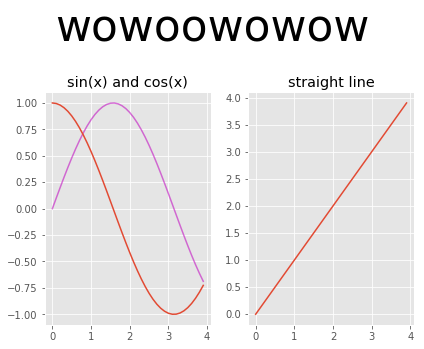

In [61]:

fig = plt.figure()
ax = fig.add_subplot(121)
plt.title('sin(x) and cos(x)')
ax2 = fig.add_subplot(1,2,2)
plt.title('straight line')
ax_ret = ax.plot(x_data, y_data, color='m', alpha=.25)
ax.plot(x_data, np.cos(x_data))
# ax_ret[0].set_alpha(.25) # alternative to using the alpha keyword when calling ax.plot
ax2.plot(x_data, x_data)

line = ax_ret[0]
line.set_alpha(.55)

fig.suptitle('wowoowowow', fontsize=44, y=1.2)
fig.tight_layout()

# Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

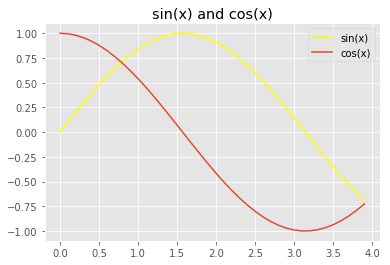

In [67]:
#Layout
fig = plt.figure()
ax = fig.add_subplot(111)
#Plotting
ax.plot(x_data, y_data, label='sin(x)', color='yellow')
ax.plot(x_data, np.cos(x_data), label='cos(x)')
ax.set_title('sin(x) and cos(x)')
ax.legend()

# Multiple plots

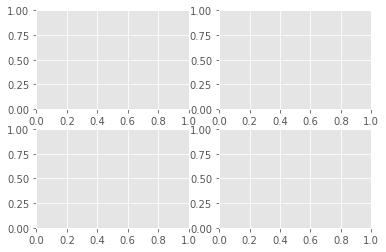

In [77]:
fig, ax_list = plt.subplots(2, 2)

ax_list[0, 1]

In [79]:
foo = np.array([[2,3,4],[6,7,8]])
foo

array([[2, 3, 4],
       [6, 7, 8]])

In [80]:
foo.shape

(2, 3)

In [81]:
foo.flatten()

array([2, 3, 4, 6, 7, 8])

In [85]:
list_1 = ['yeah', 'uh', 'sure']
list_2 = [2,53, 3]

In [87]:
list(zip(list_1, list_2))

[('yeah', 2), ('uh', 53), ('sure', 3)]

In [92]:
list_functions = [max, min, np.mean]

In [103]:
list(zip(list_functions, [list_2, list_1, [12,40]]))

[(<function max>, [2, 53, 3]),
 (<function min>, ['yeah', 'uh', 'sure']),
 (<function numpy.core.fromnumeric.mean>, [12, 40])]

In [101]:
for fun, list_thing in zip(list_functions, [list_2, list_1, [12,40]]):
    print( fun(list_thing))

53
sure
26.0


In [99]:
max([53, 'sure'])

TypeError: '>' not supported between instances of 'str' and 'int'

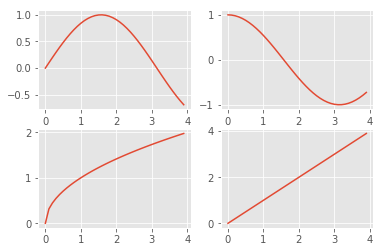

In [82]:
#Layout 2,2 with center pane.
fig, ax_list = plt.subplots(2, 2)
#ax = fig.add_subplot(3, 3, 5)
#Draw on axes
y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for subp, y_func in zip(ax_list.flatten(), y_funcs):
    subp.plot(x_data, y_func(x_data))
#ax.plot(x_data, np.log(x_data))


In [104]:
ax_list.shape

(2, 2)

In [105]:
ax_list.flatten().shape

(4,)

/home/moses/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


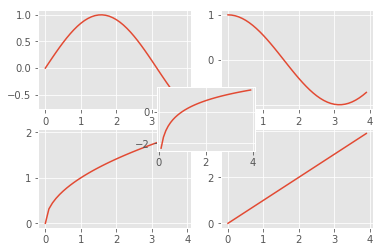

In [106]:
#Layout 2,2 with center pane.
fig, ax_list = plt.subplots(2, 2)
ax = fig.add_subplot(3, 3, 5)
#Draw on axes
y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for subp, y_func in zip(ax_list.flatten(), y_funcs):
    subp.plot(x_data, y_func(x_data))
ax.plot(x_data, np.log(x_data))


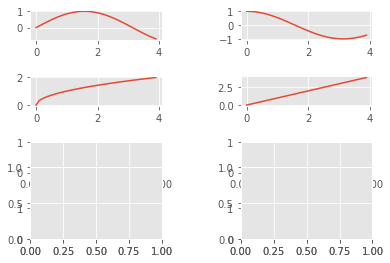

In [73]:
#Layout 2,2 with center pane.
fig, ax_list = plt.subplots(4, 2)
#ax = fig.add_subplot(3, 3, 5)
#Draw on axes
y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for subp, y_func in zip(ax_list.flatten(), y_funcs):
    subp.plot(x_data, y_func(x_data))
#ax.plot(x_data, np.log(x_data))

ax4 = fig.add_subplot(223)
ax5 = fig.add_subplot(224)
fig.tight_layout()

# What about pandas?

In [ ]:
import pandas as pd

In [107]:
df = pd.DataFrame({'x':x_data, 'sinx':np.sin(x_data), 'cosx':np.cos(x_data),
                  'rand':np.random.rand(len(x_data))})
df = df.set_index('x')
df.head()

,cosx,rand,sinx
x,,,
0.0,1.000000,0.344839,0.000000
0.1,0.995004,0.403075,0.099833
0.2,0.980067,0.829650,0.198669
0.3,0.955336,0.057809,0.295520
0.4,0.921061,0.331975,0.389418


In [108]:
df.plot?

In [109]:
df['cosx']

x
0.0    1.000000
0.1    0.995004
0.2    0.980067
0.3    0.955336
0.4    0.921061
0.5    0.877583
0.6    0.825336
0.7    0.764842
0.8    0.696707
0.9    0.621610
1.0    0.540302
1.1    0.453596
1.2    0.362358
1.3    0.267499
1.4    0.169967
1.5    0.070737
1.6   -0.029200
1.7   -0.128844
1.8   -0.227202
1.9   -0.323290
2.0   -0.416147
2.1   -0.504846
2.2   -0.588501
2.3   -0.666276
2.4   -0.737394
2.5   -0.801144
2.6   -0.856889
2.7   -0.904072
2.8   -0.942222
2.9   -0.970958
3.0   -0.989992
3.1   -0.999135
3.2   -0.998295
3.3   -0.987480
3.4   -0.966798
3.5   -0.936457
3.6   -0.896758
3.7   -0.848100
3.8   -0.790968
3.9   -0.725932
Name: cosx, dtype: float64

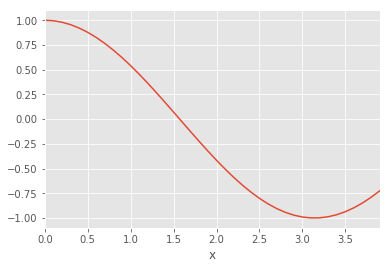

In [111]:
df['cosx'].plot();

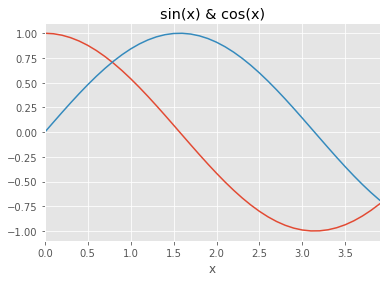

In [116]:
ax1 = df['cosx'].plot()
ax1.set_title('sin(x) & cos(x)')
df['sinx'].plot(ax=ax1)

Calling the plot method on a pandas series returns a familiar matplotlib axes object.

In [117]:
ax

(-2, 2)

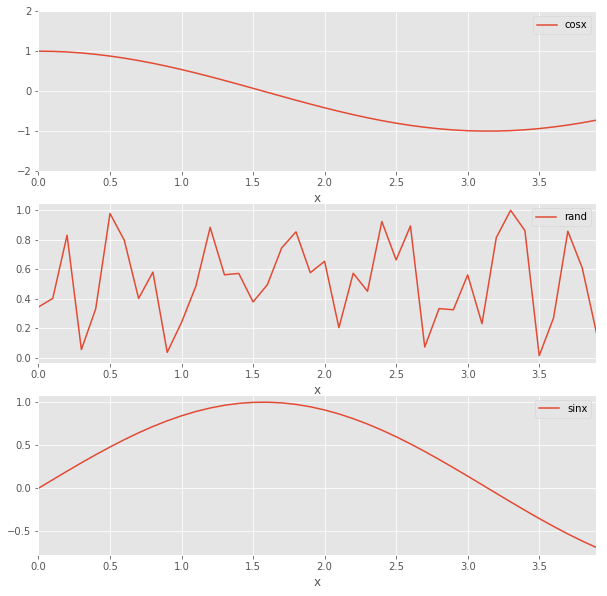

In [124]:
#We can also supply an axes object on which to draw!
fig, ax_list = plt.subplots(3,1, figsize=(10,10))
cols = df.columns
for ax, col in zip(ax_list.flatten(), cols):
    df[col].plot(ax=ax)
    ax.legend()
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-2, top=2)

In [125]:
ax_list.flatten().shape

(3,)

Pandas has some cool plotting methods

In [126]:
df = pd.read_csv('data/winequality-red.csv', sep=';')

In [127]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [128]:
np.histogram(df['alcohol'])

(array([ 37, 515, 323, 257, 232, 119,  87,  21,   7,   1]),
 array([  8.4 ,   9.05,   9.7 ,  10.35,  11.  ,  11.65,  12.3 ,  12.95,
         13.6 ,  14.25,  14.9 ]))

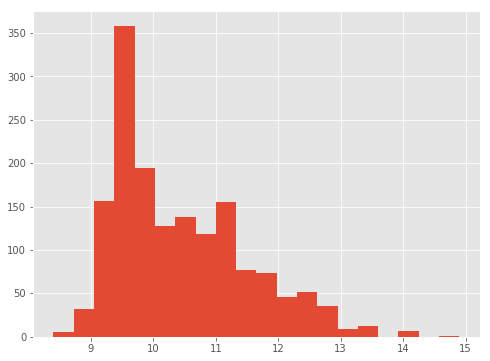

In [132]:
df['alcohol'].hist(figsize=(8,6), bins=20);

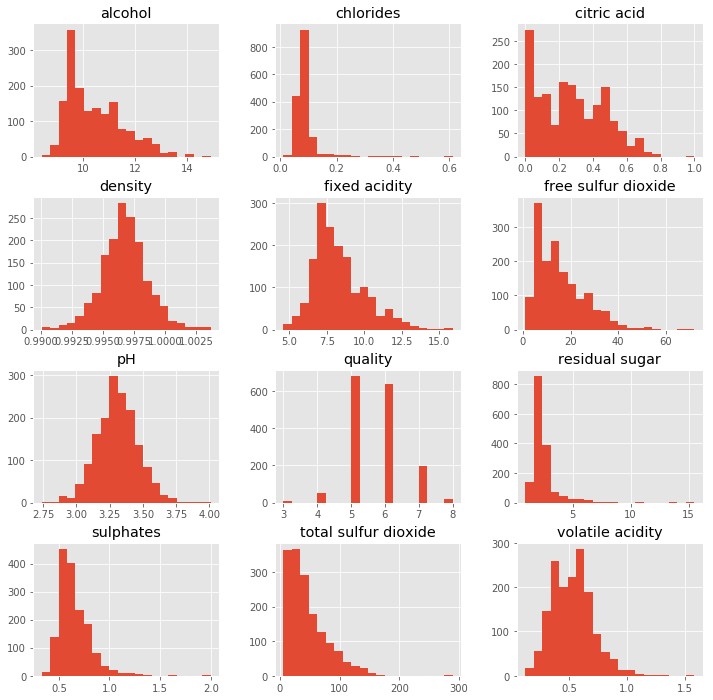

In [133]:
df.hist(figsize=(12,12), bins=20);

There's a lot going on behind the scenes in that one command.

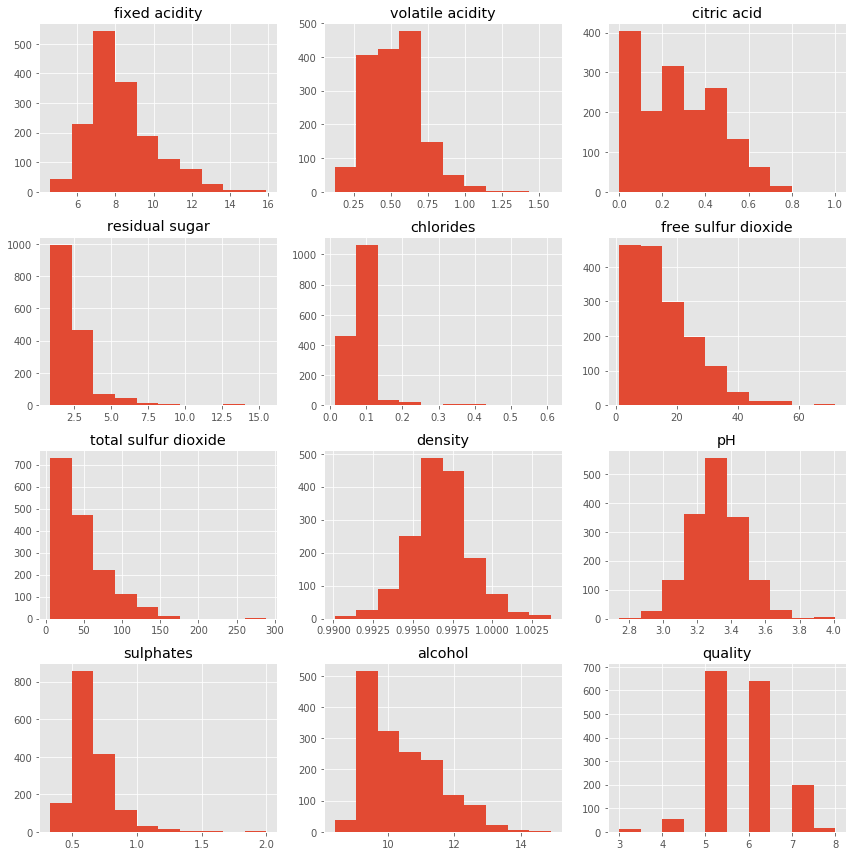

In [134]:
fig, axes = plt.subplots(4,3, figsize=(12,12))
for cell_ax, col in zip(axes.flatten(), df.columns):
    df[col].hist(ax=cell_ax)
    cell_ax.set_title(col)
fig.tight_layout() 

In [ ]:
axes

In [143]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
df.loc[0,'pH'] = np.NaN

In [145]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,NaN,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


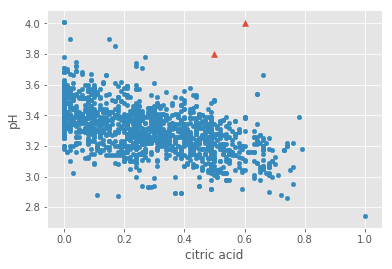

In [171]:
df.plot.scatter('citric acid','pH');
plt.scatter([0.5, 0.6], [3.8, 4], marker='^')

In [152]:
mask = df['quality'] == 5

In [158]:
mask.head()

0     True
1     True
2     True
3    False
4     True
Name: quality, dtype: bool

In [159]:
(~mask).head()

0    False
1    False
2    False
3     True
4    False
Name: quality, dtype: bool

In [163]:
pd.Series()

Series([], dtype: float64)

In [164]:
~ pd.Series()

Series([], dtype: float64)

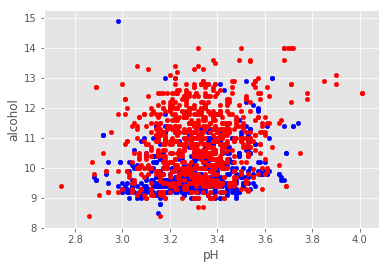

In [156]:
ax = df[mask].plot.scatter('pH', 'alcohol', color='b')
df[~mask].plot.scatter('pH', 'alcohol', color='r', ax=ax)

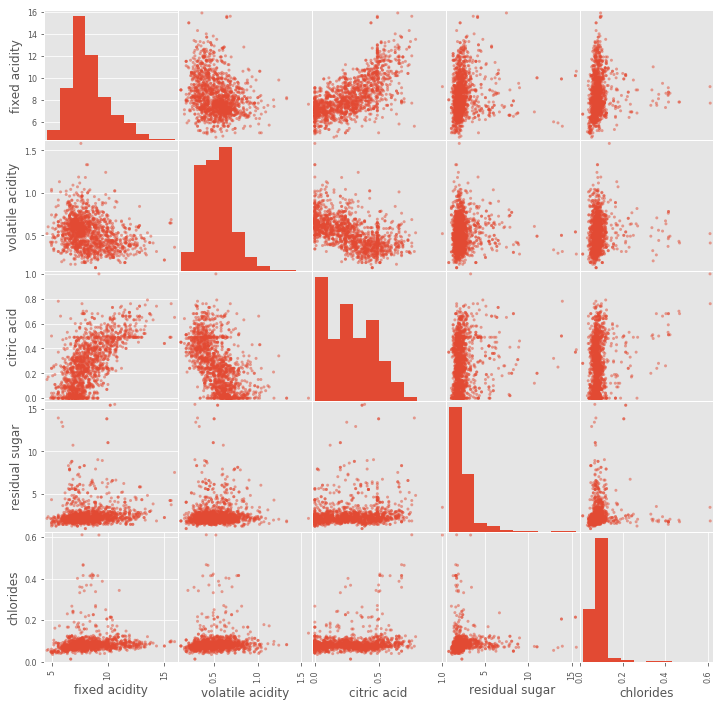

In [179]:
pd.plotting.scatter_matrix(df[df.columns[:5]], figsize=(12,12))
fig = plt.gcf()
fig.savefig('coolpic.png', format='png')

In [180]:
!ls

coolpic  coolpic.png  data  matplotlib_intro.ipynb


In [182]:
!xdg-open coolpic.png

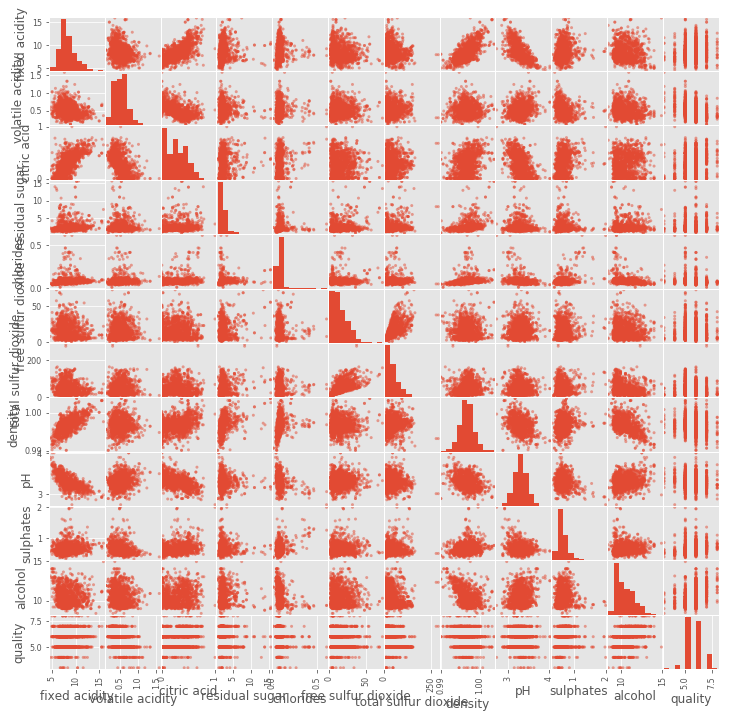

In [174]:
pd.plotting.scatter_matrix(df, figsize=(12,12));

# Writing plotting functions

### Quick tip: passing arbitrary numbers of arguments & keyword arguments

In [172]:
def our_own(*args, **kwargs):
    print(args, kwargs)
our_own(1,2,3, one=1, two=2)

(1, 2, 3) {'one': 1, 'two': 2}


### another quick reminder: unpacking

In [ ]:
data = (x_data, y_data)
plt.plot(*data)

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
out = my_plotter(ax, x_data, y_data, {'linewidth':3, 'linestyle':'--'})

In [ ]:
ax

In [ ]:
out

# Example:
Let's write a function that draws some data, and some horizontal
lines representing the 25th and 75th percentile.

We'll call it iqr_plot.

### I do: 
a function for drawing a horizontal line at some point.

### We do: 
write the iqr_plot function.

### You do: 
make a 2 by 2 grid of plots using this function.


In [ ]:
#plt.hlines?

In [ ]:
def my_hline(ax, x_data, y_level):
    out = ax.hlines(y_level, x_data.min(), x_data.max(), colors='k')
    return out

In [ ]:
def my_hline2(ax, x_data, y_level):
    out = ax.plot([x_data.min(), x_data.max()], [y_level, y_level], 'k')
    return out

In [ ]:
x_data = np.arange(0, 4, .1)
y_data = np.sin(x_data)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data,y_data)
my_hline(ax, x_data, 0.5)

In [ ]:
y_data

In [ ]:
np.percentile(y_data,25)

In [ ]:
def iqr_function(ax, x_data, y_data):
    out1 = ax.plot(x_data, y_data, '.')
    out2 = my_hline2(ax, x_data, np.percentile(y_data, 25))
    out3 = my_hline2(ax, x_data, np.percentile(y_data, 75))
    #return out1 + out2 + out3

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
iqr_function(ax, x_data, y_data)

In [ ]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x_data, .5)
plt.show()

In [ ]:
def iqr_plot(ax, x_data, y_data):
    #plot 3 things, 2 horizontal lines, data itself.
    data_line = ax.plot(x_data, y_data)
    pct_75 = np.percentile(y_data, 75)
    pct_25 = np.percentile(y_data, 25)
    upper = horizontal_line(ax, x_data, pct_75)
    lower = horizontal_line(ax, x_data, pct_25)
    return data_line + upper + lower
fig, axes = plt.subplots(1,1)
lines = iqr_plot(axes, x_data, y_data)
axes.set_title("IQR Plot")


In [ ]:
lines

In [ ]:
fig, ax_list = plt.subplots(2,2, figsize=(10,10))
Y = [f(x_data) for f in [np.sin, np.cos, np.exp, lambda x: x**3]]
for ax, y_data in zip(ax_list.flatten(), Y):
    iqr_plot(ax, x_data, y_data)